In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


logistic regression

   Age  Gender  Marital status  Occupation  Religion  \
0   18       1               1           1         1   
1   18       0               1           1         1   
2   18       1               1           1         1   
3   18       1               1           1         1   
4   17       0               1           1         1   

   Are you practicing yoga?   Regularity of yoga practice  \
0                          0                          NaN   
1                          0                          NaN   
2                          0                          NaN   
3                          0                          NaN   
4                          0                          NaN   

   Do you have any health problem?  Were you referred to yoga by a doctor?  \
0                              NaN                                     NaN   
1                              NaN                                     NaN   
2                              NaN                            

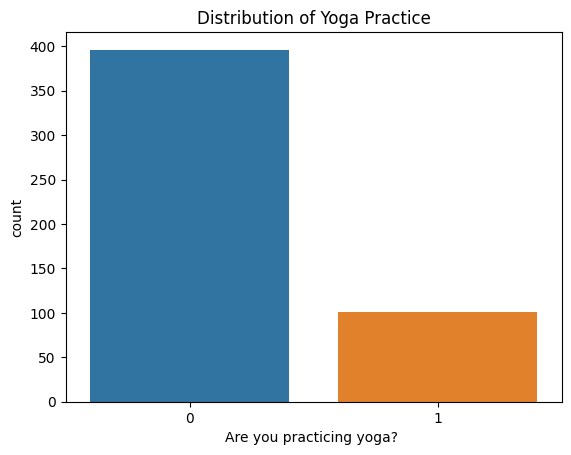

Accuracy: 0.8
Confusion Matrix:
[[80  0]
 [20  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        80
           1       1.00      0.00      0.00        20

    accuracy                           0.80       100
   macro avg       0.90      0.50      0.44       100
weighted avg       0.84      0.80      0.71       100

Accuracy: 0.8
Confusion Matrix:
[[80  0]
 [20  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        80
           1       0.00      0.00      0.00        20

    accuracy                           0.80       100
   macro avg       0.40      0.50      0.44       100
weighted avg       0.64      0.80      0.71       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


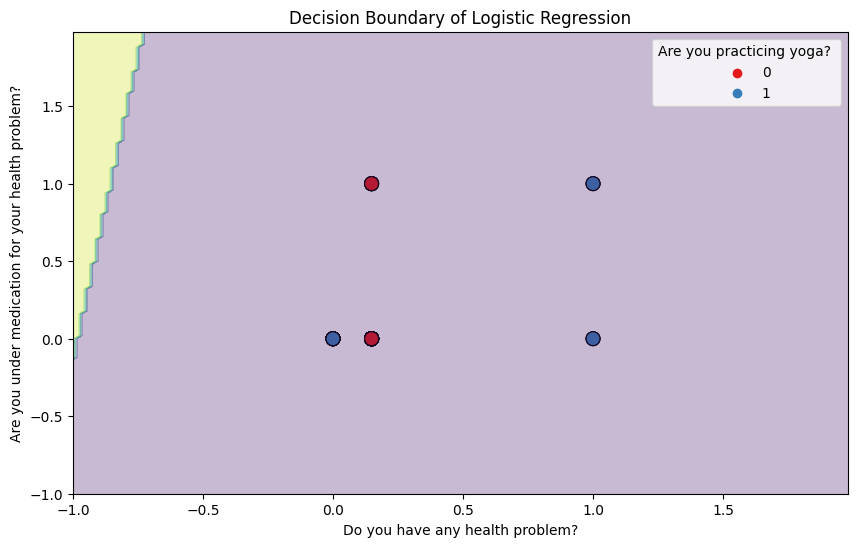

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Add this line to import NumPy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = "/content/Dataset - Working.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Visualize the distribution of the target variable 'Are you practicing yoga? '
sns.countplot(x='Are you practicing yoga? ', data=df)
plt.title('Distribution of Yoga Practice')
plt.show()

# Select relevant columns for logistic regression
X = df[['Do you have any health problem?', 'Are you under medication for your health problem?']]
y = df['Are you practicing yoga? ']

# Impute missing values (replace NaN with mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Alternatively, you can drop rows with missing values
# X.dropna(inplace=True)
# y = y[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


# Evaluate the model
classification_rep = classification_report(y_test, y_pred, zero_division=1)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Visualize the decision boundary
plt.figure(figsize=(10, 6))

# Plot the decision boundary
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, palette='Set1', edgecolor='k', s=100)
plt.title('Decision Boundary of Logistic Regression')
plt.xlabel('Do you have any health problem?')
plt.ylabel('Are you under medication for your health problem?')

# Plot the decision boundary
h = .02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)

plt.show()


linear regression

Mean Squared Error: 7.51
R^2 Score: 0.54


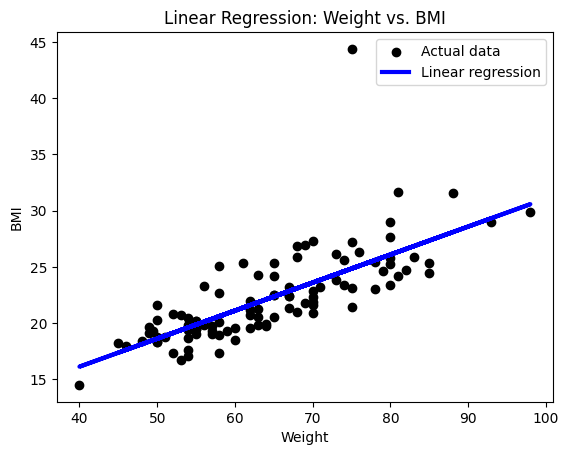

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('/content/Dataset - Working.csv')

# Extract relevant columns
df['Weight(s)'] = pd.to_numeric(df['Weight(s)'], errors='coerce')  # Convert 'Weight(s)' to numeric
df['Height()'] = pd.to_numeric(df['Height()'], errors='coerce')  # Convert 'Height()' to numeric

# Create a new feature 'BMI'
df['BMI'] = df['Weight(s)'] / ((df['Height()'] / 100) ** 2)

# Drop rows with unrealistic BMI values
df = df[(df['BMI'] > 10) & (df['BMI'] < 60)]

# Select features and target variable
X = df[['Weight(s)']]
y = df['BMI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Visualize the linear regression model
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear regression')
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.title('Linear Regression: Weight vs. BMI')
plt.legend()
plt.show()


linear 2

Mean Squared Error: 7.44
R^2 Score: 0.55


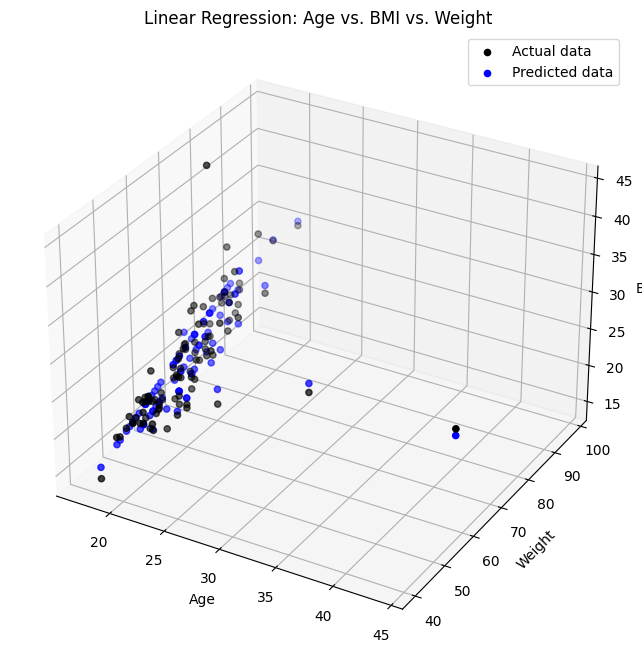

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

# Load the data
df = pd.read_csv('/content/Dataset - Working.csv')

# Extract relevant columns
df['Weight(s)'] = pd.to_numeric(df['Weight(s)'], errors='coerce')  # Convert 'Weight(s)' to numeric
df['Height()'] = pd.to_numeric(df['Height()'], errors='coerce')  # Convert 'Height()' to numeric

# Create a new feature 'BMI'
df['BMI'] = df['Weight(s)'] / ((df['Height()'] / 100) ** 2)

# Drop rows with unrealistic BMI values
df = df[(df['BMI'] > 10) & (df['BMI'] < 60)]

# Select features and target variable
X = df[['Age', 'Weight(s)']]
y = df['BMI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Visualize the linear regression model in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot Age vs. BMI vs. Weight
ax.scatter(X_test['Age'], X_test['Weight(s)'], y_test, color='black', label='Actual data')
ax.scatter(X_test['Age'], X_test['Weight(s)'], y_pred, color='blue', label='Predicted data')
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
ax.set_zlabel('BMI')
ax.set_title('Linear Regression: Age vs. BMI vs. Weight')
ax.legend()

plt.show()


lasso regression

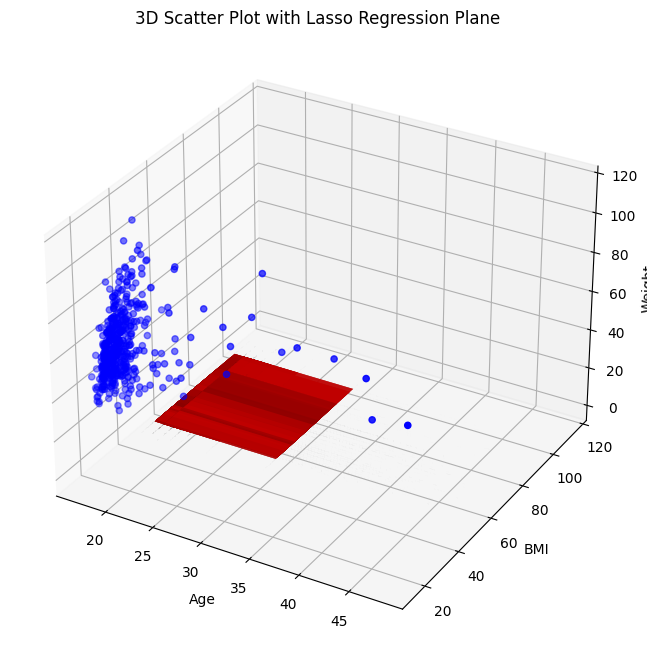

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/Dataset - Working.csv')

# Extract relevant columns
selected_features = ['Age', 'BMI', 'Weight(s)']
df['Weight(s)'] = pd.to_numeric(df['Weight(s)'], errors='coerce')
df['Height()'] = pd.to_numeric(df['Height()'], errors='coerce')

# Create a new feature 'BMI'
df['BMI'] = df['Weight(s)'] / ((df['Height()'] / 100) ** 2)

# Drop rows with unrealistic BMI values
df = df[(df['BMI'] > 10) & (df['BMI'] < 60)]

# Select features
selected_features = ['Age', 'BMI', 'Weight(s)']
df_subset = df[selected_features]

# Fit Lasso regression model
X = df_subset[['Age', 'BMI', 'Weight(s)']]
y = df_subset['BMI']

lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso.fit(X, y)

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_subset['Age'], df_subset['BMI'], df_subset['Weight(s)'], c='blue', marker='o')

# Plot the plane from the Lasso regression
xx, yy = np.meshgrid(df_subset['Age'], df_subset['Weight(s)'])
zz = lasso.coef_[0] * xx + lasso.coef_[2] * yy + lasso.intercept_

ax.plot_surface(xx, yy, zz, alpha=0.5, color='red')

ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Weight')
ax.set_title('3D Scatter Plot with Lasso Regression Plane')

plt.show()


ridge regression

Mean Squared Error: 6.57
R^2 Score: 0.60


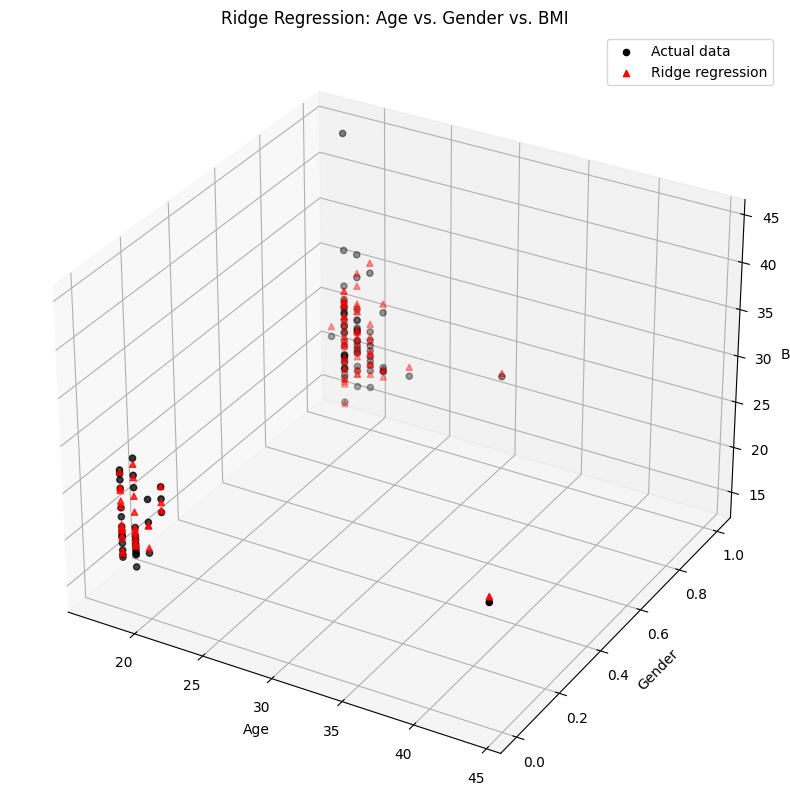

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load the data
df = pd.read_csv('/content/Dataset - Working.csv')

# Extract relevant columns
df['Weight(s)'] = pd.to_numeric(df['Weight(s)'], errors='coerce')  # Convert 'Weight(s)' to numeric
df['Height()'] = pd.to_numeric(df['Height()'], errors='coerce')  # Convert 'Height()' to numeric

# Create a new feature 'BMI'
df['BMI'] = df['Weight(s)'] / ((df['Height()'] / 100) ** 2)

# Drop rows with unrealistic BMI values
df = df[(df['BMI'] > 10) & (df['BMI'] < 60)]

# Select features and target variable
X = df[['Age', 'Gender', 'Weight(s)']]
y = df['BMI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Visualize the Ridge regression model in 4D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_test['Age'], X_test['Gender'], y_test, c='black', label='Actual data', marker='o')
scatter = ax.scatter(X_test['Age'], X_test['Gender'], y_pred, c='red', label='Ridge regression', marker='^')
ax.set_xlabel('Age')
ax.set_ylabel('Gender')
ax.set_zlabel('BMI')
ax.set_title('Ridge Regression: Age vs. Gender vs. BMI')
ax.legend()
plt.show()


lstm

Epoch 1/25
34/34 [==============================] - 9s 52ms/step - loss: 0.6769 - accuracy: 0.7733 - val_loss: 0.6495 - val_accuracy: 0.8300
Epoch 2/25
34/34 [==============================] - 0s 12ms/step - loss: 0.5985 - accuracy: 0.8615 - val_loss: 0.4735 - val_accuracy: 0.9800
Epoch 3/25
34/34 [==============================] - 0s 14ms/step - loss: 0.3162 - accuracy: 0.9547 - val_loss: 0.1506 - val_accuracy: 0.9900
Epoch 4/25
34/34 [==============================] - 0s 14ms/step - loss: 0.1499 - accuracy: 0.9849 - val_loss: 0.0964 - val_accuracy: 0.9900
Epoch 5/25
34/34 [==============================] - 0s 14ms/step - loss: 0.1408 - accuracy: 0.9647 - val_loss: 0.0774 - val_accuracy: 0.9900
Epoch 6/25
34/34 [==============================] - 0s 14ms/step - loss: 0.0837 - accuracy: 0.9899 - val_loss: 0.0510 - val_accuracy: 0.9900
Epoch 7/25
34/34 [==============================] - 0s 14ms/step - loss: 0.1127 - accuracy: 0.9748 - val_loss: 0.0354 - val_accuracy: 0.9900
Epoch 8/25
34

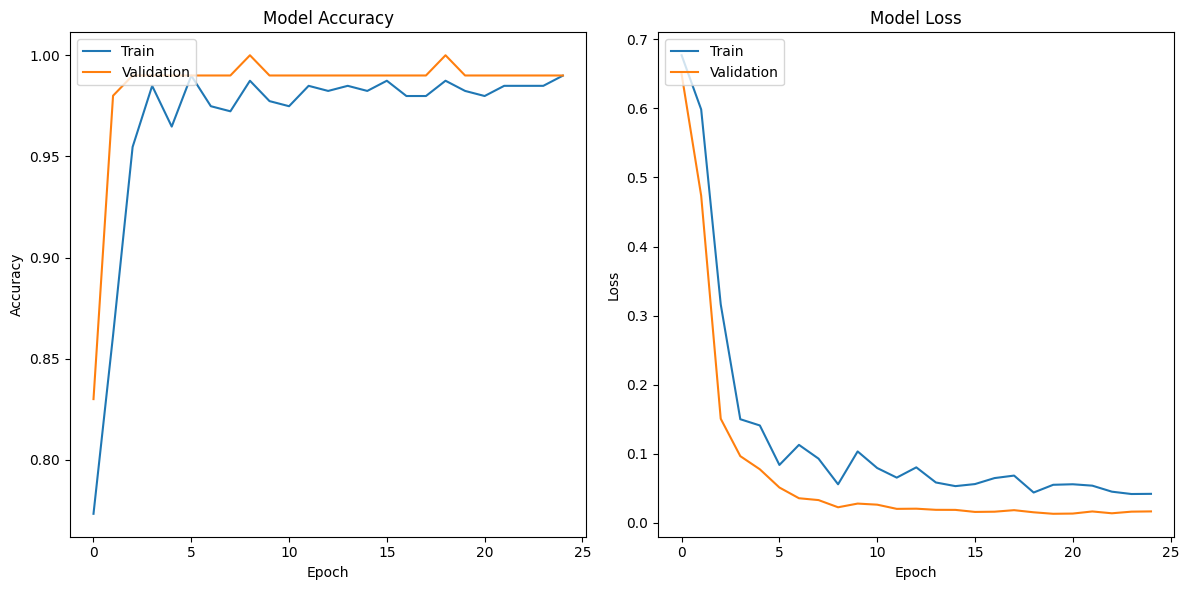

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load the data
df = pd.read_csv('/content/Dataset - One hot.csv')  # Update the path with your actual path

# Change the target variable to 'Are you practicing yoga? '
target = 'Are you practicing yoga? '

# Extract all features (excluding the target variable)
selected_features = df.columns[df.columns != target].tolist()

# Drop rows with missing values in selected features or the target
df_subset = df[selected_features + [target]].dropna()

# Normalize numerical features
scaler = StandardScaler()
df_subset[selected_features] = scaler.fit_transform(df_subset[selected_features])

# Create input and output vectors
X = df_subset[selected_features]
y = df_subset[target]

# Convert the target variable to categorical
y = to_categorical(y)

# Reshape the input data for LSTM
X = X.values.reshape(X.shape[0], 1, X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, dropout=0.5, return_sequences=True, input_shape=(1, len(selected_features))))
model.add(LSTM(64, dropout=0.5, return_sequences=True))
model.add(LSTM(32, dropout=0.5))
model.add(Dense(2, activation='softmax'))  # Assuming there are two classes for practicing yoga

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping callback
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=12, callbacks=[early_stopping])

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1] * 100))

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


gru

Epoch 1/25
34/34 [==============================] - 13s 54ms/step - loss: nan - accuracy: 0.7985 - val_loss: nan - val_accuracy: 0.8000
Epoch 2/25
34/34 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.7960 - val_loss: nan - val_accuracy: 0.8000
Epoch 3/25
34/34 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.7960 - val_loss: nan - val_accuracy: 0.8000
Epoch 4/25
34/34 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.7960 - val_loss: nan - val_accuracy: 0.8000
Epoch 5/25
34/34 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.7960 - val_loss: nan - val_accuracy: 0.8000
4/4 - 0s - loss: nan - accuracy: 0.8000 - 32ms/epoch - 8ms/step
Accuracy: 80.00%


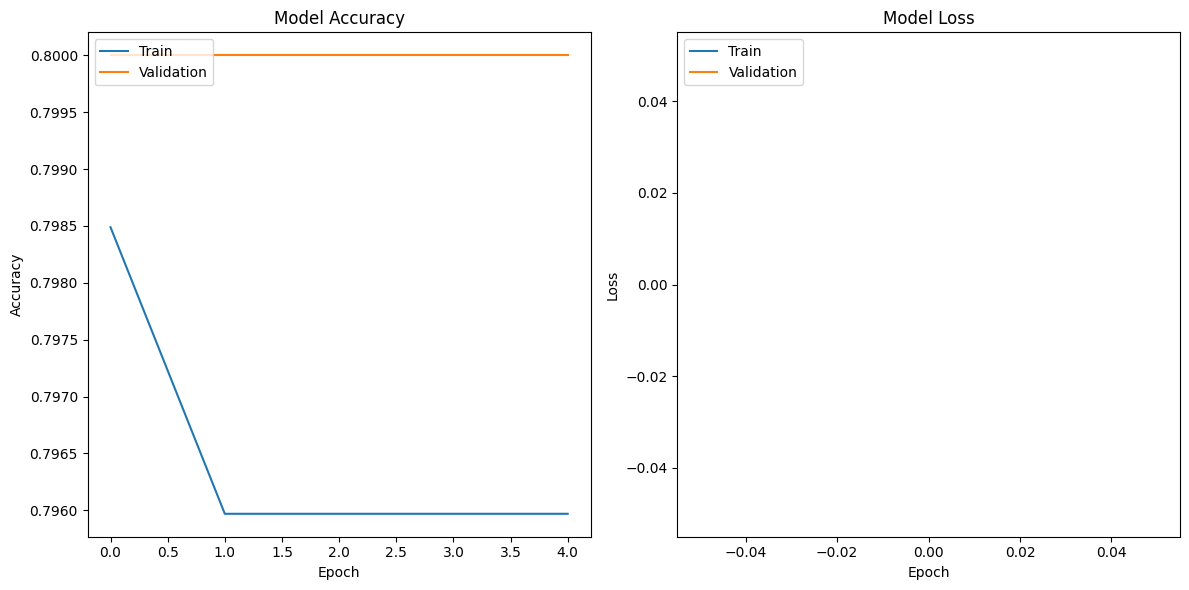

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load the data
df = pd.read_csv('/content/Dataset - Working.csv')

# Change the target variable to 'Are you practicing yoga?'
target = 'Are you practicing yoga? '

# Extract all features (excluding the target variable)
selected_features = df.columns[df.columns != target].tolist()

# Remove columns with non-numeric values
numeric_columns = df[selected_features].select_dtypes(include=[np.number]).columns
selected_features = list(set(selected_features) & set(numeric_columns))

# Ensure the target variable is numeric (0 or 1)
df[target] = df[target].apply(lambda x: 1 if str(x).lower() == 'yes' else 0 if str(x).lower() == 'no' else x)

# Normalize numerical features
scaler = StandardScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

# Create input and output vectors
X = df[selected_features]
y = df[target]

# Convert the target variable to categorical
y_categorical = to_categorical(y, num_classes=2)

# Reshape the input data for GRU
X = X.values.reshape(X.shape[0], 1, X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Build the GRU model
model = Sequential()
model.add(GRU(128, dropout=0.5, return_sequences=True, input_shape=(1, len(selected_features))))
model.add(GRU(64, dropout=0.5, return_sequences=True))
model.add(GRU(32, dropout=0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping callback
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=12, callbacks=[early_stopping])

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1] * 100))

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['Age', 'Gender', 'Marital status', 'Occupation', 'Religion',
       'Are you practicing yoga? ', 'Regularity of yoga practice',
       'Do you have any health problem?',
       'Were you referred to yoga by a doctor?',
       'Are you under medication(taking medicine)?',
       'If yes, is there any change in your medication intake after yoga practice?',
       'Is there an improvement in your health condition?',
       'Do you have faith that yoga will take care of health problem?',
       'Number of yoga practitioners in your family(Adults & Children). [Adults]',
       'Number of yoga practitioners in your family(Adults & Children). [Children ]',
       'Do you feel that, after practicing yoga, your physical & mental health has improved?',
       'Do you have any health problem?.1', 'Height()',
       'Are you under medication for your health problem?', 'Weight(s)'],
      dtype='object')

kmeans with cnn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from keras import backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def top5acc(y_true, y_pred):
    return K.metrics.top_k_categorical_accuracy(y_true, y_pred, k=5)

def create_model():
    # create model
    model = Sequential()
    model.add(Conv2D(num_pixels, (3, 3), input_shape=input_shape, activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation="relu"))
    model.add(Dense(num_classes, activation="softmax"))
    # compile model
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=sgd, metrics=['accuracy', rmse, top5acc])
    return model

sam = pd.read_csv('/media/smartspace/New Volume1/FDL/ssfeatureslist.csv')

# Your other code for data preprocessing goes here

seed = 9
np.random.seed(seed)

train = pd.read_csv('/media/smartspace/New Volume1/FDL/ssfeatslabeltrain.csv')
test  = pd.read_csv('/media/smartspace/New Volume1/FDL/ssfeatslabeltest.csv')

images = train.iloc[:,:16].values
scaler = StandardScaler().fit(images)
rescaledtrain = scaler.transform(images)

labels = train.iloc[:,16].values

test_images = test.iloc[:,:16].values
scalr = StandardScaler().fit(test_images)
rescaledtest = scalr.transform(test_images)

imags = pd.DataFrame(data=rescaledtrain)
test_imags = pd.DataFrame(data=rescaledtest)

img_rows, img_cols = 4, 4
x_train = imags.values
x_test = test_imags.values

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, 4, 4)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (4, 4, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

encoded_labels = np_utils.to_categorical(labels)
num_classes = encoded_labels.shape[1]
y_train = labels

y_test = test.iloc[:,16].values
num_pixels = 4
num_classes = 3

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

model = create_model()
history = model.fit(x_train, y_train, validation_split=0.2, shuffle=True, epochs=100, batch_size=10, verbose=2)

y_pred = model.predict(x_test)
y_pred = y_pred.argmax(1)

plt.title('RMSE vs Epochs')
plt.plot(history.history['rmse'])
plt.ylabel('RMSE')
plt.xlabel('Epochs')
plt.show()

plt.title('Top-5 Accuracy vs Epochs')
plt.plot(history.history['top5acc'])
plt.ylabel('Top-5 Accuracy')
plt.xlabel('Epochs')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


ImportError: ignored

bayseian classifer


Accuracy of the Naive Bayes classifier: 98.67%


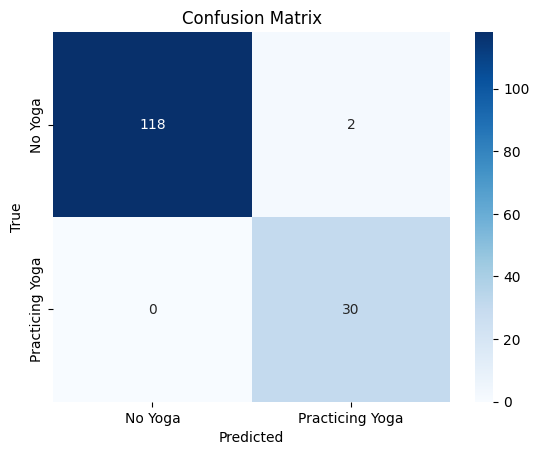

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       120
           1       0.94      1.00      0.97        30

    accuracy                           0.99       150
   macro avg       0.97      0.99      0.98       150
weighted avg       0.99      0.99      0.99       150



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/Dataset - One hot.csv')  # Replace 'your_dataset.csv' with the actual file name

# Define the target variable and features
target_variable = 'Are you practicing yoga?'
categorical_columns = ['Gender', 'Marital status', 'Occupation', 'Religion',
                        'Do you have any health problem?', 'Were you referred to yoga by a doctor?',
                        'Are you under medication(taking medicine)?',
                        'If yes, is there any change in your medication intake after yoga practice?',
                        'Is there an improvement in your health condition?',
                        'Do you have faith that yoga will take care of health problem?']
numerical_columns = ['Age', 'Number of yoga practitioners in your family(Adults & Children). [Adults]',
                      'Height()', 'Weight(s)']

# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Drop rows with missing values
columns_to_drop_na = [target_variable] + numerical_columns + categorical_columns
df_cleaned = df.dropna(subset=columns_to_drop_na)

# Encode categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[numerical_columns + categorical_columns],
    df_cleaned[target_variable],
    test_size=0.3,
    random_state=42
)

# Create the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train (fit) the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = naive_bayes_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the Naive Bayes classifier: {accuracy:.2%}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Yoga', 'Practicing Yoga'],
            yticklabels=['No Yoga', 'Practicing Yoga'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)


decision trees

Dataset Length:  497
Dataset Shape:  (497, 104)
Column Names:  Index(['Age', 'Gender', 'Marital status', 'Occupation', 'Religion',
       'Are you practicing yoga? ', 'Regularity of yoga practice',
       'Do you have any health problem?',
       'Were you referred to yoga by a doctor?',
       'Are you under medication(taking medicine)?',
       ...
       ' [Do you eat oily / spicy / tinned / packed foods?]',
       ' [Does sexual thoughts bother you?]',
       ' [Do vulgar words / language knowingly or unknowingly comes out of your mouth?]',
       ' [Do you spend more money on dresses, cosmetics and jewels?]',
       ' [Do you get suicidal thoughts?]',
       ' [Are you involved in a relationship with another boy / girl?]',
       ' [Are you disturbed by any health issues?]',
       ' [Do you feel you can cope with unfavourable situation in your life?]',
       ' [Do you have the habit of taking leave from school or college without any reason?]',
       ' [Did you have any physical

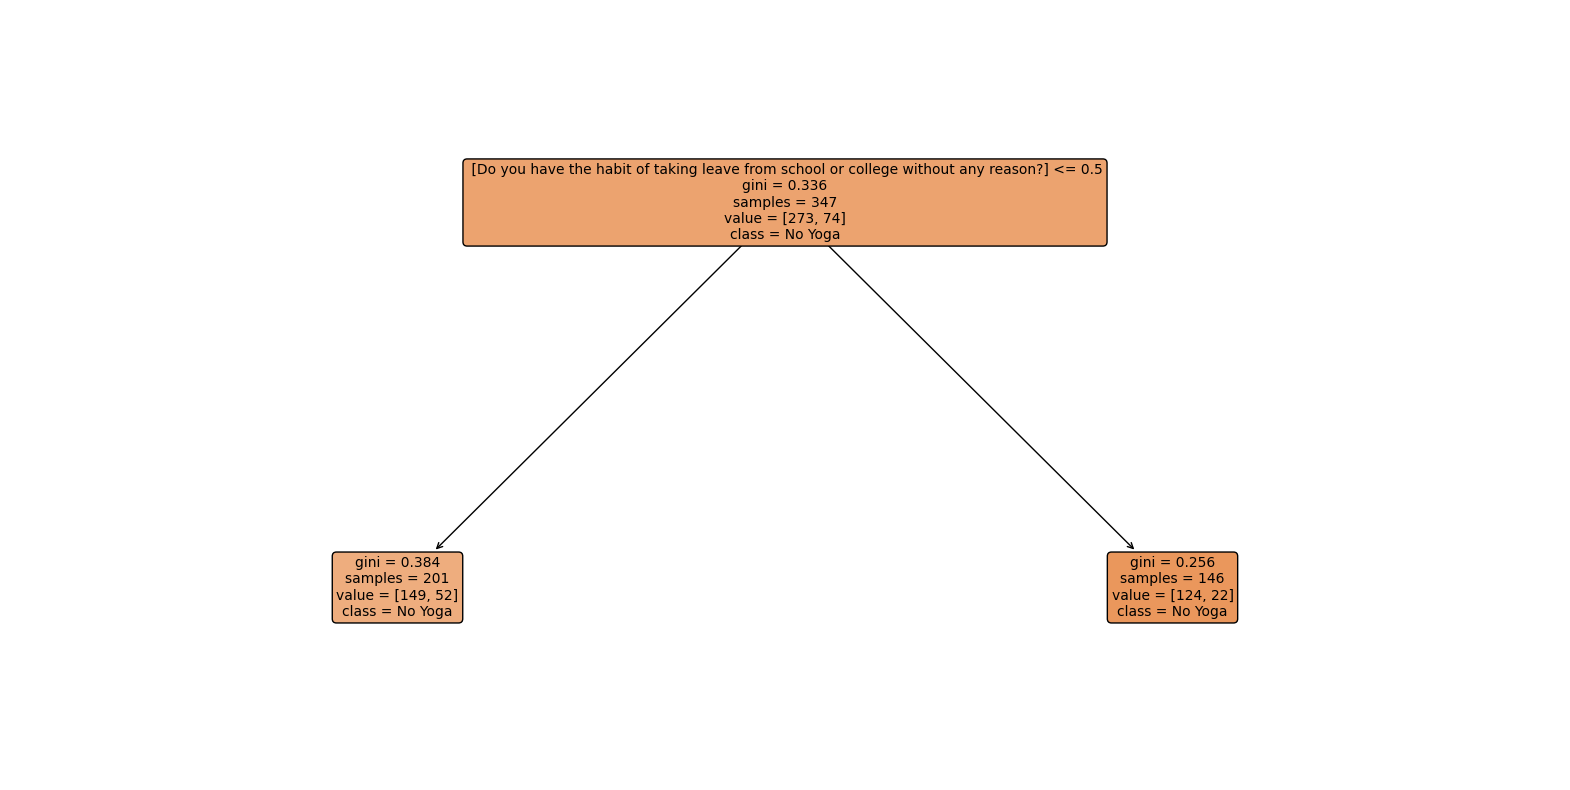

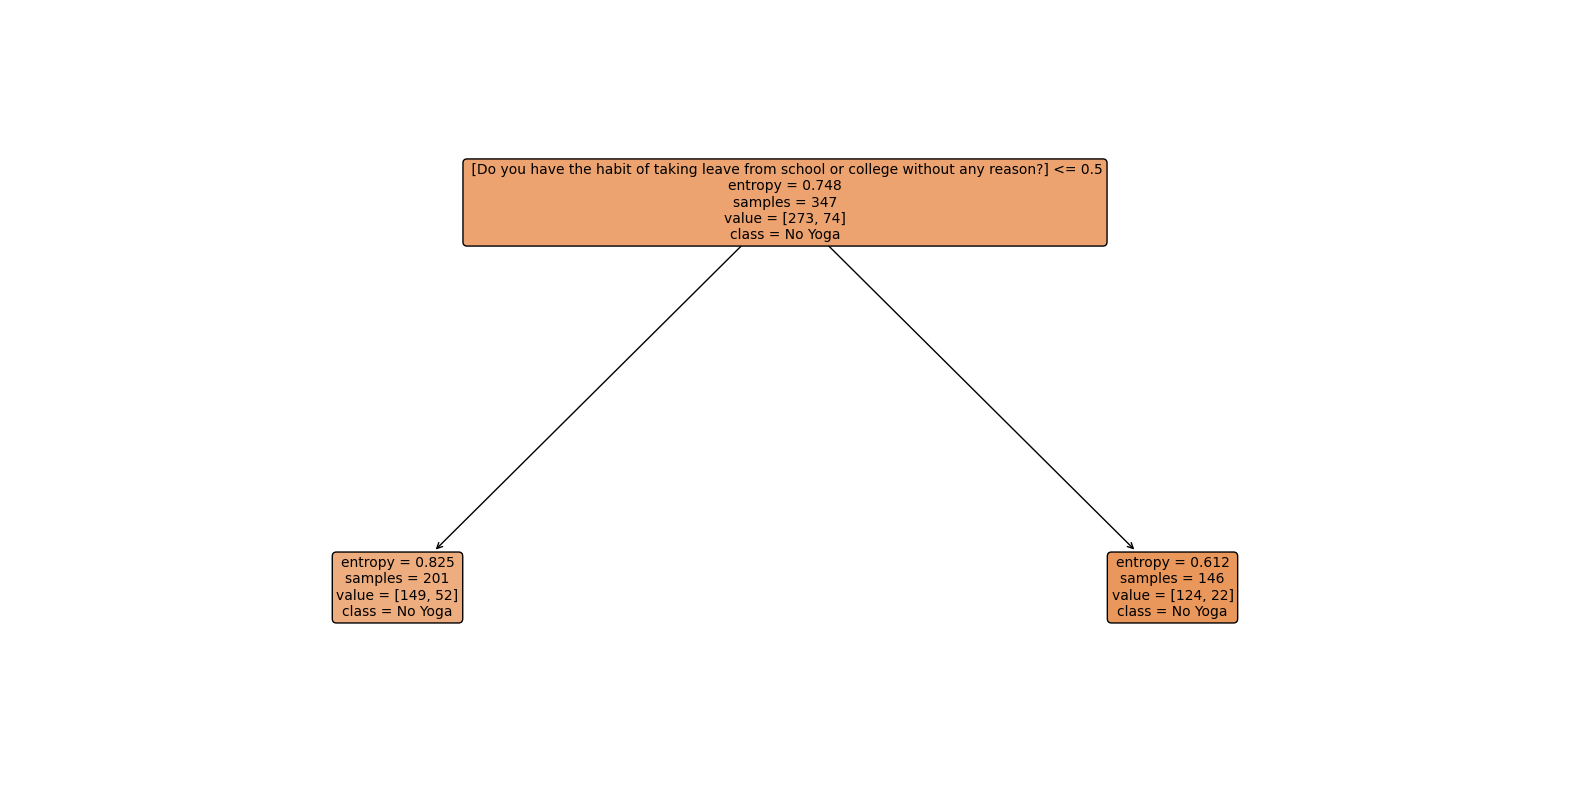

In [ ]:
# DECISION TREE
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.exceptions import UndefinedMetricWarning
import warnings
import matplotlib.pyplot as plt

# Suppressing warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Function to import Dataset
def importdata():
    # Assuming 'Dataset - Working.csv' is your dataset file
    balance_data = pd.read_csv('/content/Dataset - One hot.csv')

    for column in balance_data.columns:
        if balance_data[column].dtype == 'object':
            balance_data[column] = LabelEncoder().fit_transform(balance_data[column])

    # Handle missing values
    balance_data = balance_data.dropna()  # This removes rows containing NaN values

    # Printing the dataset shape
    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)

    # Printing the dataset observations
    print("Column Names: ", balance_data.columns)
    print("Dataset: ", balance_data.head())
    return balance_data

# Function to split the dataset
def splitdataset(balance_data):
    # Assuming the columns you mentioned are your independent variables
    X = balance_data.drop(['Are you practicing yoga? '], axis=1)

    # Assuming 'Are you practicing yoga? ' is your dependent variable
    Y = balance_data['Are you practicing yoga? ']

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

    return X, Y, X_train, X_test, y_train, y_test

# Function to perform training with Gini Index
def train_using_gini(X_train, X_test, y_train):
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=120)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

# Function to perform training with Entropy
def train_using_entropy(X_train, X_test, y_train):
    # Creating the classifier object
    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=130)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

# Function to make predictions
def prediction(X_test, clf_object):
    # Prediction on the test set
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)
    print("Report: ", classification_report(y_test, y_pred))

# Function to plot the decision tree
def plot_decision_tree(clf, feature_names, class_names):
    plt.figure(figsize=(20, 10))
    plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
    plt.show()

# Main driver code
def main():
    # Building Phase
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)

    # Operational Phase
    print("Results Using Gini Index:")
    # Prediction using Gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)

    print("\nResults Using Entropy:")
    # Prediction using Entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)

    # Plotting decision trees
    plot_decision_tree(clf_gini, X.columns, ['No Yoga', 'Practicing Yoga'])
    plot_decision_tree(clf_entropy, X.columns, ['No Yoga', 'Practicing Yoga'])

# Calling the main function
if __name__ == "__main__":
    main()


bayes

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load your dataset
your_data = pd.read_csv('/content/Dataset - One hot.csv')

# Assuming the last column is the label or cluster information
class_labels = your_data.iloc[:, -1]

# Assuming the first column is an index and the rest are features
data = your_data.iloc[:, 1:-1]

print('KMeans Labelling')
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters).fit(data)
class_labels = kmeans.labels_

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, class_labels, test_size=0.30, random_state=42)

X_train = np.asarray(X_train)
X_train = X_train.tolist()
tr_sam = len(X_train)

y_train = np.asarray(y_train)
y_train = y_train.tolist()

classes = []

if len(classes) == 0:
    for i in range(0, n_clusters):
        classes.append([])

for i in range(0, len(y_train)):
    if y_train[i] == 0:
        classes[0].append(X_train[i])
    elif y_train[i] == 1:
        classes[1].append(X_train[i])
    elif y_train[i] == 2:
        classes[2].append(X_train[i])

print("class 0")
print(classes[0])

prob_class0 = len(classes[0]) / tr_sam
print("P(Class = 0) is ", prob_class0)

print("*****************************************************************")
print("class 1")
print(classes[1])

prob_class1 = len(classes[1]) / tr_sam
print("P(Class = 1) is ", prob_class1)

print("*****************************************************************")
print("class 2")
print(classes[2])

prob_class2 = len(classes[2]) / tr_sam
print("P(Class = 2) is ", prob_class2)
print("*****************************************************************")


def freq(buff):
    zeros = 0
    ones = 0
    for i in range(0, len(buff)):
        if buff[i] == 0:
            zeros = zeros + 1
        elif buff[i] == 1:
            ones = ones + 1
    return zeros, ones

prob_mat1 = [[]]

for k in range(0, len(classes[0][0])):
    buff = []
    for j in range(0, len(classes[0])):
        buff.append(classes[0][j][k])

    buff = np.asarray(buff)
    buff = np.reshape(buff, (-1, 1))

    zeros, ones = freq(buff)
    prob_zeros_class0 = zeros / len(classes[0])
    prob_ones_class0 = ones / len(classes[0])
    if prob_mat1[0] == []:
        prob_mat1[0].append(prob_zeros_class0)
        prob_mat1[0].append(prob_ones_class0)
    else:
        l = len(prob_mat1)
        prob_mat1.append([])
        nl = l + 1
        prob_mat1[nl - 1].append(prob_zeros_class0)
        prob_mat1[nl - 1].append(prob_ones_class0)

print("Probabilities of Class 0", prob_mat1)

prob_mat2 = [[]]

for k in range(0, len(classes[1][0])):
    buff = []
    for j in range(0, len(classes[1])):
        buff.append(classes[1][j][k])

    buff = np.asarray(buff)
    buff = np.reshape(buff, (-1, 1))

    zeros, ones = freq(buff)
    prob_zeros_class1 = zeros / len(classes[1])
    prob_ones_class1 = ones / len(classes[1])
    if prob_mat2[0] == []:
        prob_mat2[0].append(prob_zeros_class1)
        prob_mat2[0].append(prob_ones_class1)
    else:
        l = len(prob_mat2)
        prob_mat2.append([])
        nl = l + 1
        prob_mat2[nl - 1].append(prob_zeros_class1)
        prob_mat2[nl - 1].append(prob_ones_class1)

print("\nProbabilities of Class 1", prob_mat2)

prob_mat3 = [[]]

for k in range(0, len(classes[2][0])):
    buff = []
    for j in range(0, len(classes[2])):
        buff.append(classes[2][j][k])

    buff = np.asarray(buff)
    buff = np.reshape(buff, (-1, 1))

    zeros, ones = freq(buff)
    prob_zeros_class2 = zeros / len(classes[2])
    prob_ones_class2 = ones / len(classes[2])
    if prob_mat3[0] == []:
        prob_mat3[0].append(prob_zeros_class2)
        prob_mat3[0].append(prob_ones_class2)
    else:
        l = len(prob_mat3)



KMeans Labelling


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


class 0
[[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 178.0, 1.0, 60.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0], [0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 163.0, 0.0, 63.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Dataset - Data.csv"
df = pd.read_csv(file_path)

# Corrected target variable name (remove extra space at the end)
target_variable = 'Are you practicing yoga? '

# One-hot encoding for the 'Gender' column
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Display the updated DataFrame
print(df_encoded.head())

# Verify the corrected target variable
print(df_encoded[target_variable].value_counts())


   Age Marital status Occupation Education Religion       Residence  \
0   18         Single    Student      U.G.    Hindu       Telangana   
1   18         Single    Student      U.G.    Hindu          Kerala   
2   18         Single    Student      U.G.    Hindu      Tamil Nadu   
3   18         Single    Student      U.G.    Hindu      Tamil Nadu   
4   17         Single    Student      U.G.    Hindu  Andhra Pradesh   

  Are you practicing yoga?  Regularity of yoga practice  \
0                        No                         NaN   
1                        No                         NaN   
2                        No                         NaN   
3                        No                         NaN   
4                        No                         NaN   

  Number of times practicing yoga in a day Do you have any health problem?  \
0                                      NaN                             NaN   
1                                      NaN                    